<a href="https://colab.research.google.com/github/vnaudoori28/LogicMojo_AIML_Practice/blob/main/Lakshmi_IMDb%2BMovie%2BAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [3]:
import pandas as pd

In [4]:
# Read the csv file using 'read_csv'. Please write your dataset location here.
# Dataset location - https://docs.google.com/spreadsheets/d/1FmNMKE6w8EEZOWeMGx90ng6gNQRxzDWTJxK-MfR46w8/edit?gid=0#gid=0

#df1 = pd.read_csv('https://docs.google.com/spreadsheets/d/1Xayzm98X6ooqlOaKQNKmYxhaAfdzwTSP2vBR9op_5cs/gviz/tq?tqx=out:csv')
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1FmNMKE6w8EEZOWeMGx90ng6gNQRxzDWTJxK-MfR46w8/gviz/tq?tqx=out:csv')
df1 = df.copy()
#df1 = pd.read_csv('https://docs.google.com/spreadsheets/d/1FmNMKE6w8EEZOWeMGx90ng6gNQRxzDWTJxK-MfR46w8/gviz/tq?tqx=out:csv')
df1.head(3)


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Unnamed: 62,Unnamed: 63
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,NaN,NaN
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,NaN,NaN
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,NaN,NaN


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [5]:
# Check the number of rows and columns in the dataframe
df1.shape



(100, 64)

In [6]:
# Check the column-wise info of the dataframe
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [7]:
# Check the summary for the numeric columns
df1.describe()



,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,Unnamed: 62,Unnamed: 63
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,0.0
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000,NaN,NaN
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099,NaN,NaN
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000,NaN,NaN
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000,NaN,NaN
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000,NaN,NaN
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000,NaN,NaN
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000,NaN,NaN


## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data.

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [8]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

df1['budget'] = df1['budget']/1000000
df1['Gross'] = df1['Gross']/1000000

df1.head(3)


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Unnamed: 62,Unnamed: 63
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,NaN,NaN
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,NaN,NaN
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,NaN,NaN


-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [9]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column

df1['profit']=df1['Gross']-df1['budget']
df1.head(3)



,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Unnamed: 62,Unnamed: 63,profit
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.6,7.5,7.1,8.3,8.1,PG-13,USA,NaN,NaN,121.101803
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.6,8.0,8.0,PG,USA,NaN,NaN,191.268248
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,NaN,NaN,39.738905


In [10]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'

df1.sort_values(by='profit',ascending=False)
df1.head(3)


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Unnamed: 62,Unnamed: 63,profit
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.6,7.5,7.1,8.3,8.1,PG-13,USA,NaN,NaN,121.101803
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.6,8.0,8.0,PG,USA,NaN,NaN,191.268248
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,NaN,NaN,39.738905


In [11]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)

df1_top10 = df1.iloc[0:10]
df1_top10



,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Unnamed: 62,Unnamed: 63,profit
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.6,7.5,7.1,8.3,8.1,PG-13,USA,NaN,NaN,121.101803
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.6,8.0,8.0,PG,USA,NaN,NaN,191.268248
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,NaN,NaN,39.738905
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.6,7.7,7.3,8.0,7.9,PG-13,USA,NaN,NaN,53.546139
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.6,7.1,7.9,7.8,R,USA,NaN,NaN,38.695371
5,Hell or High Water,2016,12.0,27.007844,Chris Pine,Jeff Bridges,Ben Foster,19000,12000.0,9000.0,...,7.6,7.7,7.3,7.9,7.5,R,USA,NaN,NaN,15.007844
6,Doctor Strange,2016,165.0,232.641920,Benedict Cumberbatch,Chiwetel Ejiofor,Rachel McAdams,19000,NaN,46000.0,...,7.4,7.8,7.1,7.6,7.4,PG-13,USA,NaN,NaN,67.641920
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,7.6,7.9,6.9,7.9,7.7,PG,USA,NaN,NaN,-59.192738
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,7.9,7.9,7.8,8.4,8.4,PG-13,USA,NaN,NaN,198.130642
9,Captain America: Civil War,2016,250.0,407.197282,Robert Downey Jr.,Scarlett Johansson,Chris Evans,21000,19000.0,11000.0,...,7.6,7.9,7.5,8.1,7.7,PG-13,USA,NaN,NaN,157.197282


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

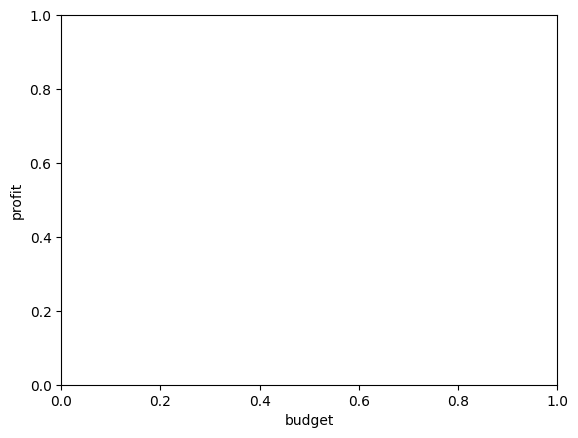

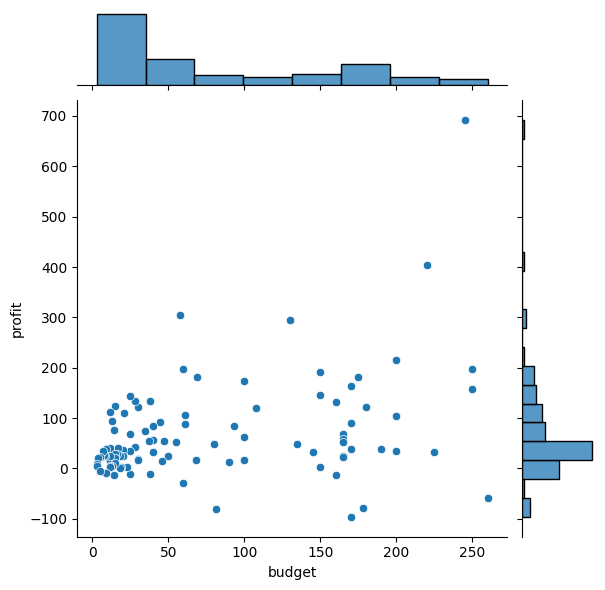

In [13]:
#Plot profit vs budget

plt.xlabel('budget')
plt.ylabel('profit')
#plt.title('Profit vs Budget')
#plt.scatter(df1['budget'],df1['profit'])
#plt.show()
sns.jointplot(x='budget',y='profit',data=df1)

#df['budget'].value_counts().plot(kind= 'bar')
#df1[['budget','profit']].plot(kind= 'bar')

In [14]:
#df1['profit','budget'].corr()

The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [15]:
#Find the movies with negative profit

df1_neg_profit = df1[df1['profit']<0]
display(df1_neg_profit.shape)
df1_neg_profit['Title']


(11, 65)

,Title
7,Tangled
17,Edge of Tomorrow
22,Hugo
28,X-Men: First Class
39,The Little Prince
46,Scott Pilgrim vs. the World
56,Rush
66,Warrior
82,Flipped
89,Amour


In [16]:
df1_neg_profit_sorted = df1_neg_profit.sort_values(by='profit',ascending=True)
df1_neg_profit_sorted

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Unnamed: 62,Unnamed: 63,profit
22,Hugo,2011,170.0,73.820094,ChloÃ« Grace Moretz,Christopher Lee,Ray Winstone,17000,16000.0,1000.0,...,7.5,7.6,7.4,7.7,7.5,PG,USA,NaN,NaN,-96.179906
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.4,7.9,6.6,7.7,7.7,PG,France,NaN,NaN,-79.860848
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.8,7.8,7.5,8.0,7.8,PG-13,USA,NaN,NaN,-77.810499
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,7.6,7.9,6.9,7.9,7.7,PG,USA,NaN,NaN,-59.192738
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.1,7.0,6.6,7.8,7.4,PG-13,USA,NaN,NaN,-28.505730
28,X-Men: First Class,2011,160.0,146.405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,...,7.5,7.7,7.3,7.8,7.7,PG-13,USA,NaN,NaN,-13.594629
82,Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.3,7.6,6.4,7.5,7.7,PG,USA,NaN,NaN,-12.247786
66,Warrior,2011,25.0,13.651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,7.7,7.5,7.1,8.2,8.1,PG-13,USA,NaN,NaN,-11.348338
56,Rush,2013,38.0,26.903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.8,7.8,7.1,7.9,8.1,R,UK,NaN,NaN,-11.096291
89,Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.8,8.1,7.2,7.9,7.8,PG-13,France,NaN,NaN,-8.674623


In [17]:
#find the position of tangled in the sorted list

# Find the row where the 'Title' is 'Tangled' and get its index
tangled_index = df1_neg_profit_sorted[df1_neg_profit['Title'] == 'Tangled'].index

tangled_index

Index([7], dtype='int64')

**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience.

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [18]:
# Change the scale of MetaCritic

df1['MetaCriticScaled'] = df1['MetaCritic']/10
#df1_neg_profit = df1[df1['profit']<0]
df1.head(3)


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Unnamed: 62,Unnamed: 63,profit,MetaCriticScaled
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.5,7.1,8.3,8.1,PG-13,USA,NaN,NaN,121.101803,9.3
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.6,8.0,8.0,PG,USA,NaN,NaN,191.268248,7.8
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.4,7.1,8.1,8.0,PG-13,Australia,NaN,NaN,39.738905,6.9


In [19]:
# Find the average ratings
#df1['AvgRating'] = df1[np.average('MetaCriticScaled'] + df1['Rating'])]

#df1.info()
df1['AvgRating'] = (df1['MetaCriticScaled'] + df1['IMDb_rating'])/2
df1.head(3)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes1000,VotesUS,VotesnUS,content_rating,Country,Unnamed: 62,Unnamed: 63,profit,MetaCriticScaled,AvgRating
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.1,8.3,8.1,PG-13,USA,NaN,NaN,121.101803,9.3,8.75
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.6,8.0,8.0,PG,USA,NaN,NaN,191.268248,7.8,7.95
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.1,8.1,8.0,PG-13,Australia,NaN,NaN,39.738905,6.9,7.50


In [20]:
#Sort in descending order of average rating

df1.sort_values(by='AvgRating',ascending=False,inplace=True)
df1.head(3)


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes1000,VotesUS,VotesnUS,content_rating,Country,Unnamed: 62,Unnamed: 63,profit,MetaCriticScaled,AvgRating
94,Boyhood,2014,4.0,25.359200,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,...,7.2,8.0,7.9,R,USA,NaN,NaN,21.359200,10.0,8.95
69,12 Years a Slave,2013,20.0,56.667870,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,...,7.7,8.3,8.0,R,USA,NaN,NaN,36.667870,9.6,8.85
18,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,7.6,8.2,8.1,PG,USA,NaN,NaN,181.454367,9.4,8.80


In [21]:
# Find the movies with metacritic-rating and IMDb_< 0.5 and also with the average rating of >8

df1_UniversalAcclaim = df1[(abs(df1['MetaCriticScaled'] - df1['IMDb_rating'])<0.5) & (df1['AvgRating']>8)]
df1_UniversalAcclaim.head(3)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes1000,VotesUS,VotesnUS,content_rating,Country,Unnamed: 62,Unnamed: 63,profit,MetaCriticScaled,AvgRating
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.0,8.6,8.4,R,USA,NaN,NaN,9.792000,8.8,8.65
35,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,7.8,8.4,8.4,R,USA,NaN,NaN,62.804648,8.1,8.25
93,Dallas Buyers Club,2013,5.0,27.296514,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,...,7.2,8.0,7.9,R,USA,NaN,NaN,22.296514,8.4,8.20


**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?

In [22]:
star_war = df1_UniversalAcclaim[df1_UniversalAcclaim['Title'] == 'Star Wars']
star_war

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes1000,VotesUS,VotesnUS,content_rating,Country,Unnamed: 62,Unnamed: 63,profit,MetaCriticScaled,AvgRating


In [23]:
df1_UniversalAcclaim.shape

(5, 67)

In [24]:
df1_UniversalAcclaim

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes1000,VotesUS,VotesnUS,content_rating,Country,Unnamed: 62,Unnamed: 63,profit,MetaCriticScaled,AvgRating
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.0,8.6,8.4,R,USA,NaN,NaN,9.792000,8.8,8.65
35,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,7.8,8.4,8.4,R,USA,NaN,NaN,62.804648,8.1,8.25
93,Dallas Buyers Club,2013,5.0,27.296514,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,...,7.2,8.0,7.9,R,USA,NaN,NaN,22.296514,8.4,8.20
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.7,8.2,7.9,PG-13,USA,NaN,NaN,691.662225,8.1,8.10
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.3,8.0,7.9,PG-13,USA,NaN,NaN,53.546139,8.1,8.05


In [25]:
star_war = df1_UniversalAcclaim[df1_UniversalAcclaim['Title'].str.contains('StaR', case = False, na=False)]
star_war

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes1000,VotesUS,VotesnUS,content_rating,Country,Unnamed: 62,Unnamed: 63,profit,MetaCriticScaled,AvgRating
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.7,8.2,7.9,PG-13,USA,NaN,NaN,691.662225,8.1,8.1


In [26]:
mission_i = df1_UniversalAcclaim[df1_UniversalAcclaim['Title'].str.contains('mission', case = False, na=False)]
mission_i

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes1000,VotesUS,VotesnUS,content_rating,Country,Unnamed: 62,Unnamed: 63,profit,MetaCriticScaled,AvgRating


- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [27]:
# Write your code here
#df1.info()
df1['trio_score'] = df1['actor_1_facebook_likes'].fillna(0) + df1['actor_2_facebook_likes'].fillna(0) + df1['actor_3_facebook_likes'].fillna(0)
df1.head(3)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,VotesUS,VotesnUS,content_rating,Country,Unnamed: 62,Unnamed: 63,profit,MetaCriticScaled,AvgRating,trio_score
94,Boyhood,2014,4.0,25.359200,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,...,8.0,7.9,R,USA,NaN,NaN,21.359200,10.0,8.95,550.0
69,12 Years a Slave,2013,20.0,56.667870,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,...,8.3,8.0,R,USA,NaN,NaN,36.667870,9.6,8.85,3160.0
18,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.2,8.1,PG,USA,NaN,NaN,181.454367,9.4,8.80,2151.0


In [28]:
df1 = df1.sort_values(by='trio_score',ascending=False)
df1.head(5)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,VotesUS,VotesnUS,content_rating,Country,Unnamed: 62,Unnamed: 63,profit,MetaCriticScaled,AvgRating,trio_score
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.1,8.0,PG-13,Australia,NaN,NaN,39.738905,6.9,7.50,138800.0
27,Inception,2010,160.0,292.568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,8.7,8.8,PG-13,USA,NaN,NaN,132.568851,7.4,8.10,79000.0
14,X-Men: Days of Future Past,2014,200.0,233.914986,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,...,8.1,7.9,PG-13,USA,NaN,NaN,33.914986,7.4,7.70,76000.0
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.9,7.8,R,USA,NaN,NaN,38.695371,9.6,8.75,74818.0
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.4,8.4,PG-13,USA,NaN,NaN,198.130642,7.8,8.10,73000.0


- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`**

- **`Most popular trio after applying the condition:`**

**`Optional:`** Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [29]:
# Your answer here (optional)
df1['valid_actor1'] = (df1['actor_1_facebook_likes'] >= (df1['actor_2_facebook_likes'] + df1['actor_3_facebook_likes'])/2)
df1['valid_actor2'] = (df1['actor_2_facebook_likes'] >= (df1['actor_1_facebook_likes'] + df1['actor_3_facebook_likes'])/2)
df1['valid_actor3'] = (df1['actor_3_facebook_likes'] >= (df1['actor_2_facebook_likes'] + df1['actor_1_facebook_likes'])/2)

df1.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Country,Unnamed: 62,Unnamed: 63,profit,MetaCriticScaled,AvgRating,trio_score,valid_actor1,valid_actor2,valid_actor3
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,Australia,NaN,NaN,39.738905,6.9,7.50,138800.0,False,True,False
27,Inception,2010,160.0,292.568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,USA,NaN,NaN,132.568851,7.4,8.10,79000.0,True,True,False
14,X-Men: Days of Future Past,2014,200.0,233.914986,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,...,USA,NaN,NaN,33.914986,7.4,7.70,76000.0,True,False,False
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,USA,NaN,NaN,38.695371,9.6,8.75,74818.0,False,True,False
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,USA,NaN,NaN,198.130642,7.8,8.10,73000.0,True,False,False


In [30]:
df1['valid_actor_combo'] = df1['valid_actor1'] & df1['valid_actor2'] & df1['valid_actor3']
df1.head()


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Unnamed: 62,Unnamed: 63,profit,MetaCriticScaled,AvgRating,trio_score,valid_actor1,valid_actor2,valid_actor3,valid_actor_combo
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,NaN,NaN,39.738905,6.9,7.50,138800.0,False,True,False,False
27,Inception,2010,160.0,292.568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,NaN,NaN,132.568851,7.4,8.10,79000.0,True,True,False,False
14,X-Men: Days of Future Past,2014,200.0,233.914986,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,...,NaN,NaN,33.914986,7.4,7.70,76000.0,True,False,False,False
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,NaN,NaN,38.695371,9.6,8.75,74818.0,False,True,False,False
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,NaN,NaN,198.130642,7.8,8.10,73000.0,True,False,False,False


In [31]:
df1_valid_actor_combo = df1[df1['valid_actor_combo'] == True]
df1_valid_actor_combo.head()


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Unnamed: 62,Unnamed: 63,profit,MetaCriticScaled,AvgRating,trio_score,valid_actor1,valid_actor2,valid_actor3,valid_actor_combo


- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

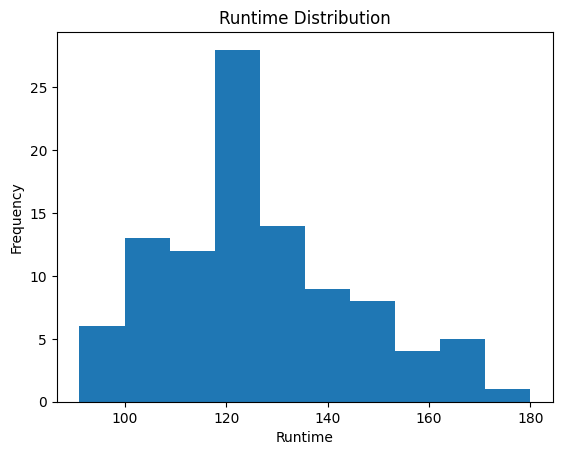

In [32]:
# Runtime histogram/density plot

plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Runtime Distribution')
plt.hist(df1['Runtime'])
plt.show()

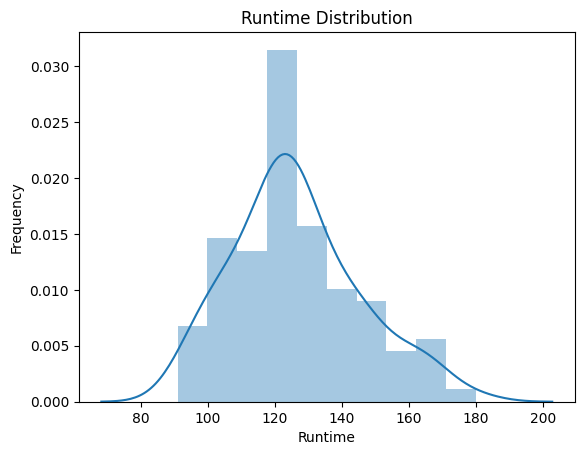

In [33]:
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Runtime Distribution')
sns.distplot(df1['Runtime'])
plt.show()

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [34]:
# Write your code here
#R_rated = df[df['content_rating'] == 'R']
#R_rated.sort_values('CVotesU18', ascending = False, inplace = True )
#R_rated.head(10)


df_R_Rated = df1[df1['content_rating'] == 'R']
df_R_Rated.sort_values(by='CVotesU18',ascending=False,inplace=True)
display(df_R_Rated.shape)
df_R_Rated.head(10)


(42, 72)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Unnamed: 62,Unnamed: 63,profit,MetaCriticScaled,AvgRating,trio_score,valid_actor1,valid_actor2,valid_actor3,valid_actor_combo
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,NaN,NaN,305.024263,6.5,7.25,17166.0,True,False,False,False
36,The Wolf of Wall Street,2013,100.0,116.866727,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,...,NaN,NaN,16.866727,7.5,7.85,44000.0,True,False,False,False
35,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,NaN,NaN,62.804648,8.1,8.25,40265.0,True,False,False,False
29,Mad Max: Fury Road,2015,150.0,153.629485,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,...,NaN,NaN,3.629485,9.0,8.55,36943.0,True,False,False,False
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,NaN,NaN,9.792000,8.8,8.65,25505.0,True,False,False,False
31,The Revenant,2015,135.0,183.635922,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000.0,733.0,...,NaN,NaN,48.635922,7.6,7.80,56733.0,True,True,False,False
40,Shutter Island,2010,80.0,127.968405,Leonardo DiCaprio,Joseph Sikora,Nellie Sciutto,29000,223.0,163.0,...,NaN,NaN,47.968405,6.3,7.20,29386.0,True,False,False,False
43,Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,NaN,NaN,106.735396,7.9,8.00,2272.0,True,True,False,False
65,The Grand Budapest Hotel,2014,25.0,59.073773,Bill Murray,Tom Wilkinson,F. Murray Abraham,13000,1000.0,670.0,...,NaN,NaN,34.073773,8.8,8.45,14670.0,True,False,False,False
72,Birdman or (The Unexpected Virtue of Ignorance),2014,18.0,42.335698,Emma Stone,Naomi Watts,Merritt Wever,15000,6000.0,529.0,...,NaN,NaN,24.335698,8.8,8.30,21529.0,True,False,False,False


In [35]:
#df_R_Rated['CVotesU18'>0].head(10)
df_R_Rated[df_R_Rated['CVotesU18'] > 0].shape

(42, 72)

**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

In [36]:
#dead_pool = df_PopularR_sorted[df_PopularR_sorted['Title'].str.contains('dead', case = False, na=False)]
#dead_pool
#df_R_Rated[df_R_Rated['Title' == 'Deadpool']]

df_R_Rated[df_R_Rated['Title'] == 'Deadpool']


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Unnamed: 62,Unnamed: 63,profit,MetaCriticScaled,AvgRating,trio_score,valid_actor1,valid_actor2,valid_actor3,valid_actor_combo
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,NaN,NaN,305.024263,6.5,7.25,17166.0,True,False,False,False


In [37]:
df1.columns

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country', 'Unnamed: 62', 'Unnamed: 63',
       'profit', 'MetaCriticScaled',

In [38]:
genre_columns = [col for col in df1.columns if 'genre' in col]
print(genre_columns)

['genre_1', 'genre_2', 'genre_3']


## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns.
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively.
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [39]:
#df_by_genre = df[['genre_1', 'genre_2', 'genre_3','CVotes10',
#       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
#       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
#       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
#       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
#       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
#       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
#       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
#       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
#       'VotesnUS']]
#df_by_genre.shape

In [40]:
# Create the dataframe df_by_genre

#cvote_columns = [col for col in df1.columns if 'CVotes' in col]
#print(cvote_columns)
vote_columns = [col for col in df1.columns if 'Votes' in col]
print(vote_columns)
len(vote_columns)



['CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS', 'VotesnUS']


44

In [41]:
df_by_genre = df1[genre_columns + vote_columns]
df_by_genre.info()


<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2 to 34
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genre_1       100 non-null    object 
 1   genre_2       97 non-null     object 
 2   genre_3       74 non-null     object 
 3   CVotes10      100 non-null    int64  
 4   CVotes09      100 non-null    int64  
 5   CVotes08      100 non-null    int64  
 6   CVotes07      100 non-null    int64  
 7   CVotes06      100 non-null    int64  
 8   CVotes05      100 non-null    int64  
 9   CVotes04      100 non-null    int64  
 10  CVotes03      100 non-null    int64  
 11  CVotes02      100 non-null    int64  
 12  CVotes01      100 non-null    int64  
 13  CVotesMale    100 non-null    int64  
 14  CVotesFemale  100 non-null    int64  
 15  CVotesU18     100 non-null    int64  
 16  CVotesU18M    100 non-null    int64  
 17  CVotesU18F    100 non-null    int64  
 18  CVotes1829    100 non-null    int64 

In [42]:
df_by_genre.head(3)

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
2,Biography,Drama,NaN,23325,29830,40564,20296,5842,1669,558,...,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0
27,Action,Adventure,Sci-Fi,584839,485218,304457,130972,46393,20595,10050,...,8.8,8.7,8.7,8.5,8.1,8.1,8.0,8.2,8.7,8.8
14,Action,Adventure,Sci-Fi,91765,127521,183578,104658,33027,10059,3710,...,8.2,7.8,7.8,8.0,7.7,7.7,7.9,7.4,8.1,7.9


In [43]:
df_by_genre.shape

(100, 47)

In [44]:
# Create a column cnt and initialize it to 1

df_by_genre['cnt'] = 1
df_by_genre.head(10)


,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
2,Biography,Drama,NaN,23325,29830,40564,20296,5842,1669,558,...,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,1
27,Action,Adventure,Sci-Fi,584839,485218,304457,130972,46393,20595,10050,...,8.7,8.7,8.5,8.1,8.1,8.0,8.2,8.7,8.8,1
14,Action,Adventure,Sci-Fi,91765,127521,183578,104658,33027,10059,3710,...,7.8,7.8,8.0,7.7,7.7,7.9,7.4,8.1,7.9,1
4,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,...,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,1
8,Action,Thriller,NaN,380589,341965,281426,134959,50406,20106,9589,...,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,1
68,Comedy,Drama,Romance,73783,107247,184382,123467,46614,17257,6997,...,7.6,7.7,7.6,7.6,7.6,7.7,6.9,8.0,7.6,1
11,Action,Sci-Fi,NaN,260257,234203,264290,162604,67579,27957,12176,...,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9,1
6,Action,Adventure,Fantasy,38952,51465,102744,83322,32430,10744,3786,...,7.4,7.4,7.7,7.5,7.4,7.8,7.1,7.6,7.4,1
1,Animation,Adventure,Comedy,53626,70912,102352,57261,16719,4539,1467,...,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,1
62,Biography,Comedy,Drama,22879,48091,94303,58756,18650,6141,2253,...,7.7,7.7,7.6,7.7,7.7,7.8,7.3,7.9,7.7,1


In [45]:
# Group the movies by individual genres

#df_by_g1 = df_by_genre.groupby('genre_1').sum(numeric_only=True).reset_index()
df_by_g1 = df_by_genre.groupby('genre_1').sum(numeric_only=True)
df_by_g1.head()



,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_1,,,,,,,,,,,,,,,,,,,,,
Action,2928407,3261919,4247693,2662020,986774,364234,156150,89483,61975,162426,...,209.1,208.8,210.0,206.5,206.0,209.0,197.2,215.8,209.5,27
Adventure,1058779,1179818,1560541,966275,365486,136985,58559,33174,22018,48100,...,92.7,92.6,93.5,92.0,91.6,93.8,88.9,95.3,93.5,12
Animation,681562,798227,1153214,722782,251076,83069,30718,15733,10026,25193,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11
Biography,666831,1088430,1654704,962977,306247,100005,38874,21536,15365,37469,...,100.8,100.7,101.3,100.5,100.0,102.9,94.7,103.3,101.5,13
Comedy,371217,496905,770395,518566,205434,81933,35788,20965,15286,33241,...,68.6,68.7,68.9,67.7,67.5,68.7,62.7,70.9,69.4,9


In [46]:
df_by_g2 = df_by_genre.groupby('genre_2').sum(numeric_only = True)
df_by_g2.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_2,,,,,,,,,,,,,,,,,,,,,
Action,238060,285510,430062,260106,88580,29250,10820,5521,3598,8821,...,30.9,30.7,31.8,30.5,30.4,31.4,29.0,31.8,31.1,4
Adventure,2297820,2548864,3271725,2055600,758009,272735,113691,64623,44121,116937,...,171.0,170.4,173.9,169.2,168.4,172.8,162.7,176.4,171.6,22
Biography,185172,313178,576374,370003,119348,38643,14844,7974,5248,13828,...,38.3,38.2,38.5,38.0,37.9,38.8,35.4,39.4,38.4,5
Comedy,428995,624720,854162,512668,193916,76752,35193,20995,14798,30509,...,54.0,54.1,53.4,53.0,53.1,53.1,51.0,55.5,54.3,7
Crime,19576,40247,85359,64633,24920,8548,3261,1669,970,1689,...,7.5,7.6,7.2,7.6,7.6,7.4,7.2,7.8,7.6,1


In [47]:
df_by_g3 = df_by_genre.groupby('genre_3').sum(numeric_only = True)
df_by_g3.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_3,,,,,,,,,,,,,,,,,,,,,
Adventure,238060,285510,430062,260106,88580,29250,10820,5521,3598,8821,...,30.9,30.7,31.8,30.5,30.4,31.4,29.0,31.8,31.1,4
Comedy,583404,653362,882294,559835,200937,68167,26488,14258,9307,24617,...,54.8,54.6,56.0,54.3,54.1,55.3,51.7,56.2,55.2,7
Crime,171660,236650,250667,129164,46715,18682,8674,5854,4258,9689,...,8.0,8.1,7.7,7.6,7.6,7.5,7.8,8.1,8.1,1
Drama,400221,680085,1167327,748493,258717,88338,35439,19075,12475,26948,...,91.8,91.7,92.0,91.2,91.0,92.7,86.1,94.5,92.3,12
Family,29228,40728,77893,62936,27932,11179,4664,2674,1700,3023,...,7.4,7.4,7.4,7.5,7.5,7.6,7.4,7.7,7.5,1


In [48]:
display(df_by_g1.shape)
display(df_by_g2.shape)
display(df_by_g3.shape)


(8, 45)

(19, 45)

(15, 45)

In [49]:
# Add the grouped data frames and store it in a new data frame

temp = df_by_g1.add(df_by_g2, fill_value = 0 )
df_add = temp.add(df_by_g3, fill_value = 0 )
df_add.shape


(20, 45)

In [50]:
# Extract genres with atleast 10 occurences

top10 = df_add[df_add['cnt'] >= 10]
top10.shape


(10, 45)

In [51]:
# Take the mean for every column by dividing with cnt
top10.iloc[:,0:-1] = top10.iloc[:,0:-1].divide(top10['cnt'], axis = 0)
top10.head()


,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290,31.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737,38.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.763636,7.718182,7.981818,7.681818,7.645455,7.881818,7.272727,7.963636,7.827273,11.0
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,...,7.727778,7.716667,7.766667,7.694444,7.661111,7.872222,7.227778,7.927778,7.772222,18.0
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,...,7.713043,7.713043,7.752174,7.608696,7.595652,7.700000,7.191304,7.939130,7.778261,23.0


In [52]:
# Rounding off the columns of Votes to two decimals

top10[['VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'Votes1000', 'VotesUS', 'VotesnUS']] = round(top10[['VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'Votes1000', 'VotesUS', 'VotesnUS']], 2)
top10.head()


,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0


In [53]:
# Converting CVotes to int type

top10[['CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05',
       'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale',
       'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829',
       'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS']] = top10[['CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05',
       'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale',
       'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829',
       'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS']].astype(int)

top10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Action to Thriller
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CVotes10      10 non-null     int64  
 1   CVotes09      10 non-null     int64  
 2   CVotes08      10 non-null     int64  
 3   CVotes07      10 non-null     int64  
 4   CVotes06      10 non-null     int64  
 5   CVotes05      10 non-null     int64  
 6   CVotes04      10 non-null     int64  
 7   CVotes03      10 non-null     int64  
 8   CVotes02      10 non-null     int64  
 9   CVotes01      10 non-null     int64  
 10  CVotesMale    10 non-null     int64  
 11  CVotesFemale  10 non-null     int64  
 12  CVotesU18     10 non-null     int64  
 13  CVotesU18M    10 non-null     int64  
 14  CVotesU18F    10 non-null     int64  
 15  CVotes1829    10 non-null     int64  
 16  CVotes1829M   10 non-null     int64  
 17  CVotes1829F   10 non-null     int64  
 18  CVotes3044    10 non-null 

If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

In [54]:
# Countplot for genres

top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0


In [55]:
top10.reset_index( )

,index,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
1,Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
2,Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
3,Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
4,Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
5,Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
6,Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
7,Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
8,Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
9,Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0


<Axes: ylabel='cnt'>

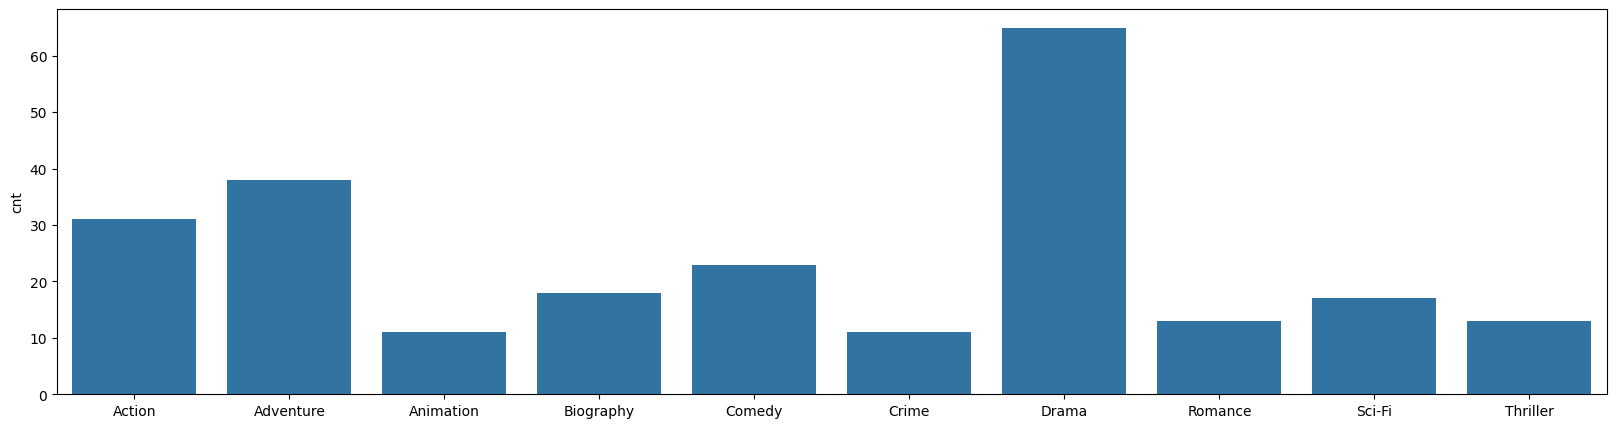

In [56]:
plt.figure(figsize=(20,5))
sns.barplot(x = top10.index.values, y = top10['cnt'], data = top10)

**`Checkpoint 5:`** Is the bar for `Drama` the tallest?

-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe.

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group.

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group.

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

Text(0.5, 1.0, 'CVOTES FEMALES')

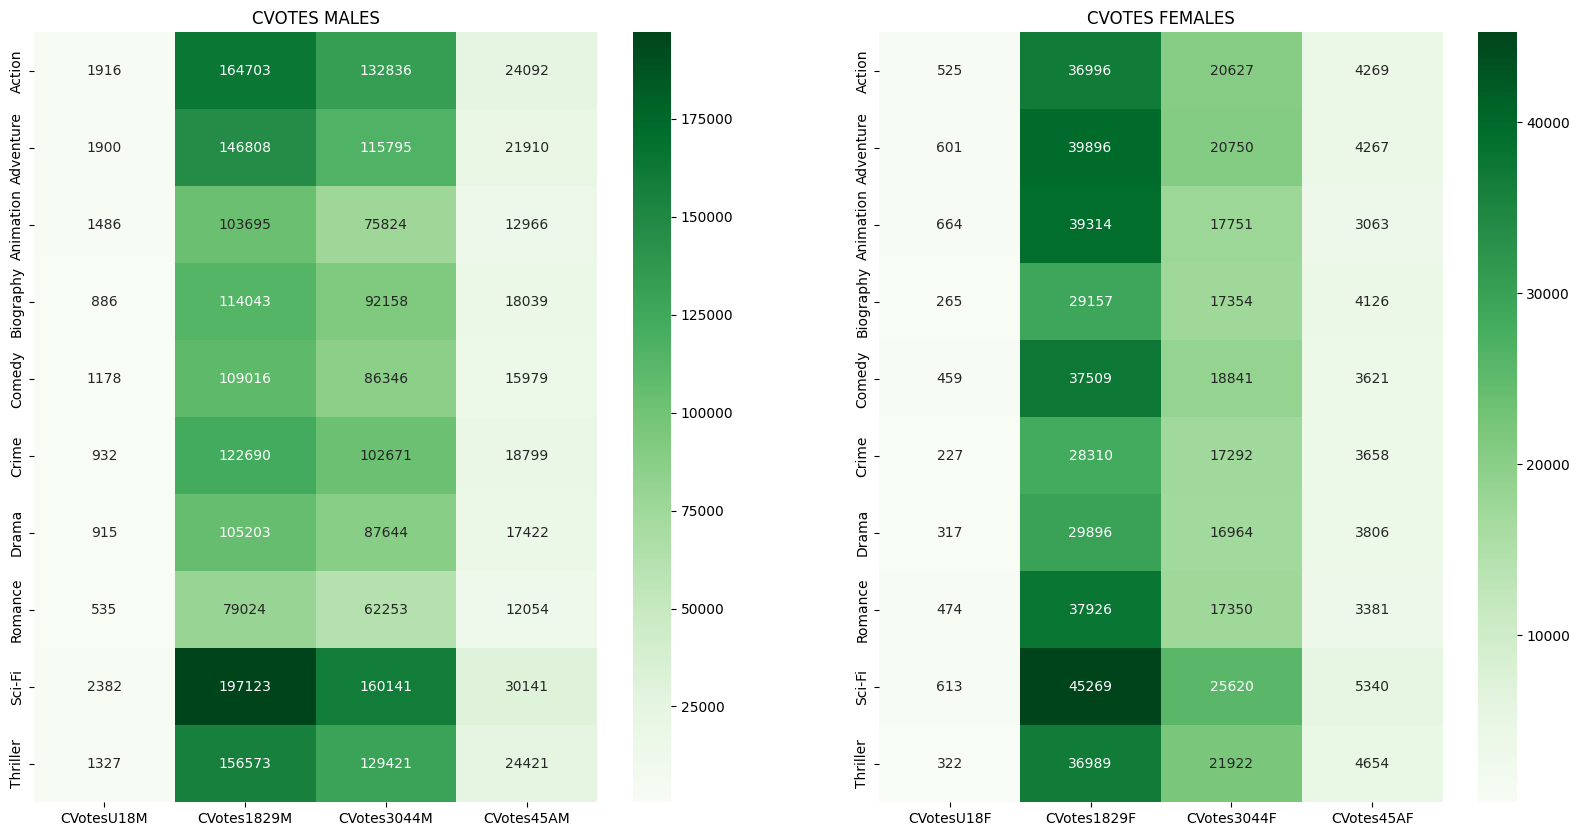

In [57]:
# 1st set of heat maps for CVotes-related columns

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.heatmap(top10[['CVotesU18M','CVotes1829M', 'CVotes3044M', 'CVotes45AM']], annot =True, cmap = 'Greens', fmt = 'd')
plt.title ('CVOTES MALES')


plt.subplot(1,2,2)
sns.heatmap(top10[['CVotesU18F','CVotes1829F', 'CVotes3044F', 'CVotes45AF']], annot =True, cmap = 'Greens', fmt = 'd')
plt.title ('CVOTES FEMALES')


**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1:Count of votes have significantly reduced in the 45+category across both Male and Female, though scifi saw slightly more votes in this category
- Inference 2:Romance and has been voted by significant percent of total young female compared to male (close to  80% compared to men with about 40% of total votes)
- Inference 3:Action and adventure have consistently similar high votes across age and gender.

In [58]:
top10.columns

Index(['CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05',
       'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale',
       'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829',
       'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'Votes1000', 'VotesUS', 'VotesnUS', 'cnt'],
      dtype='object')

Text(0.5, 1.0, 'VOTES FEMALES')

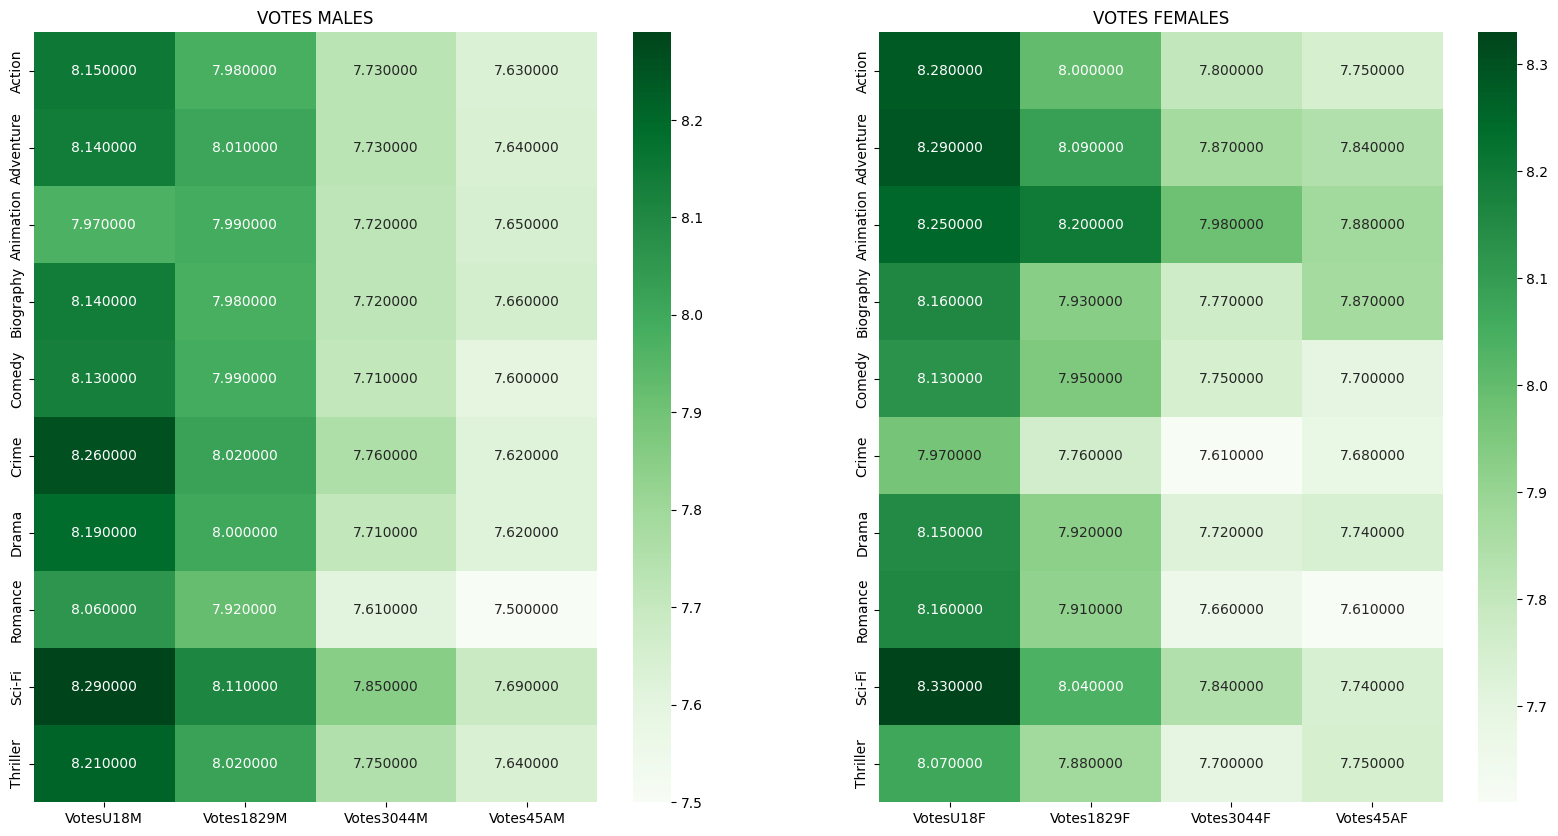

In [59]:
# 2nd set of heat maps for Votes-related columns

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.heatmap(top10[['VotesU18M','Votes1829M','Votes3044M','Votes45AM']],annot = True, cmap = 'Greens', fmt = 'f')
plt.title('VOTES MALES')

plt.subplot(1,2,2)
sns.heatmap(top10[['VotesU18F','Votes1829F','Votes3044F','Votes45AF']],annot = True, cmap = 'Greens', fmt = 'f')
plt.title('VOTES FEMALES')


**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1:Romance is rated low across both Male and Female audiences of age group 30+
- Inference 2:Animation,Adventure and Bio is rated high by Females
- Inference 3:Male group Above30 have more flattened votes vs females with more diverse interests across different genre.
  

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [60]:
df1.columns

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country', 'Unnamed: 62', 'Unnamed: 63',
       'profit', 'MetaCriticScaled',

In [61]:
# Creating IFUS column

df1['IFUS'] = df1['Country'].apply(lambda x : 'USA' if x  == 'USA' else 'Non-USA')

df1.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Unnamed: 63,profit,MetaCriticScaled,AvgRating,trio_score,valid_actor1,valid_actor2,valid_actor3,valid_actor_combo,IFUS
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,NaN,39.738905,6.9,7.50,138800.0,False,True,False,False,Non-USA
27,Inception,2010,160.0,292.568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,NaN,132.568851,7.4,8.10,79000.0,True,True,False,False,USA
14,X-Men: Days of Future Past,2014,200.0,233.914986,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,...,NaN,33.914986,7.4,7.70,76000.0,True,False,False,False,USA
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,NaN,38.695371,9.6,8.75,74818.0,False,True,False,False,USA
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,NaN,198.130642,7.8,8.10,73000.0,True,False,False,False,USA


<Axes: xlabel='CVotesnUS', ylabel='IFUS'>

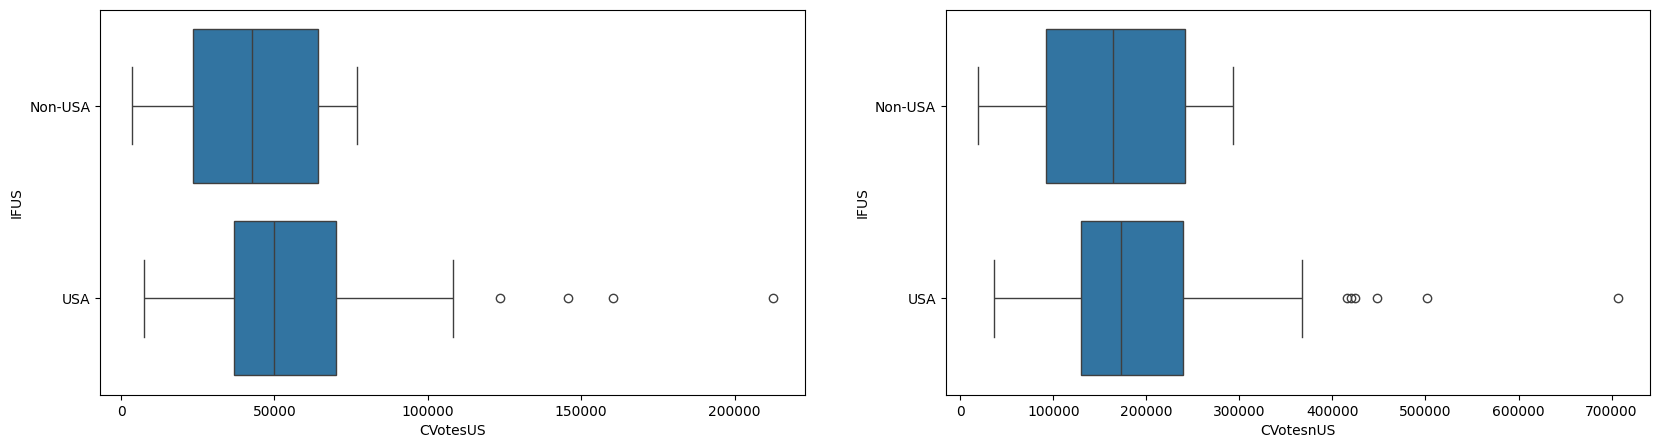

In [62]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)

plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'CVotesUS', y = "IFUS", data = df1)


plt.subplot(1,2,2)
sns.boxplot(x = 'CVotesnUS', y = "IFUS", data = df1)


**`Inferences:`** Write your two inferences/observations below:
- Inference 1:Total count of votes in non-us is almost 4 times us voters
- Inference 2:Count of both US and Non-US voters are more for US movies vs non-US movies
Non-US voters median for both US & Non-US movies is closer. Indicating international audience has more uniform acceptance across US and NonUS movies


<Axes: xlabel='VotesnUS', ylabel='IFUS'>

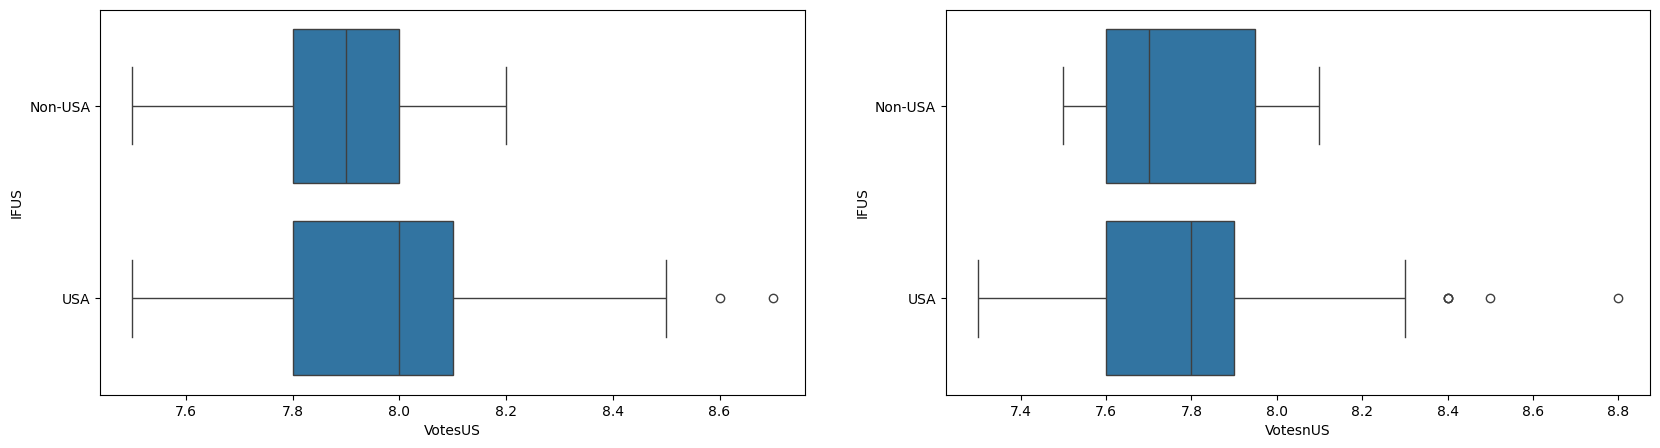

In [63]:
# Box plot - 2: VotesUS(y) vs IFUS(x)
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'VotesUS', y = "IFUS", data = df1)


plt.subplot(1,2,2)
sns.boxplot(x = 'VotesnUS', y = "IFUS", data = df1)



**`Inferences:`** Write your two inferences/observations below:
- Inference 1:Though, Median of the US Votes is higher than non-us given number of voters from non-US is 4 times, the weightage of non-us voters is overall higher
- Inference 2:

<Axes: xlabel='VotesnUS', ylabel='profit'>

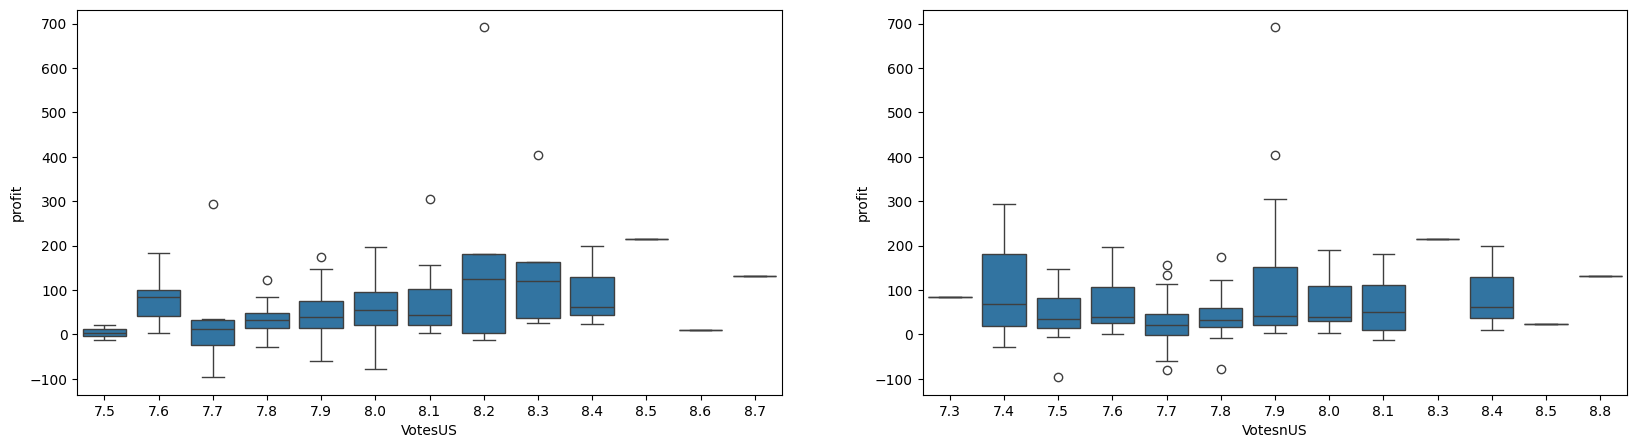

In [64]:
#Box plots - Profit vs US & Non-US votes

plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'VotesUS', y = "profit", data = df1)


plt.subplot(1,2,2)
sns.boxplot(x = 'VotesnUS', y = "profit", data = df1)



<Axes: xlabel='VotesUS', ylabel='profit'>

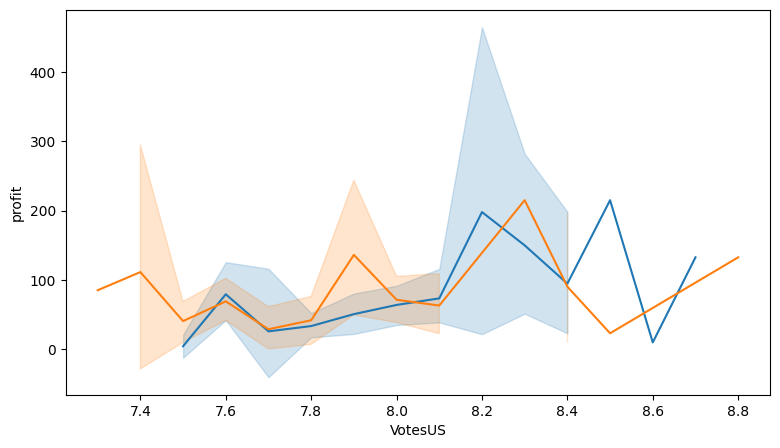

In [65]:

plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.lineplot(x = 'VotesUS', y = "profit", data = df1)


#plt.subplot(1,2,2)
sns.lineplot(x = 'VotesnUS', y = "profit", data = df1)

In [66]:
#Movies which are rated 8.5 showed diverse profit profile US vs Non-US
# Will be interesting to see the movies which are rated 8.5 by us and Non-us

#df1[(df1['VotesUS'] > 8.5) & (df1['VotesnUS'] > 8.5)]
df_US_85 = df1[df1['VotesUS'] == 8.5]
df_US_85.head()



,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Unnamed: 63,profit,MetaCriticScaled,AvgRating,trio_score,valid_actor1,valid_actor2,valid_actor3,valid_actor_combo,IFUS
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,NaN,214.984497,9.2,8.75,16721.0,True,False,False,False,USA


In [67]:
df_Non_US_85 = df1[df1['VotesnUS'] == 8.5]
df_Non_US_85


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Unnamed: 63,profit,MetaCriticScaled,AvgRating,trio_score,valid_actor1,valid_actor2,valid_actor3,valid_actor_combo,IFUS
26,Interstellar,2014,165.0,187.991439,Matthew McConaughey,Anne Hathaway,Mackenzie Foy,11000,11000.0,6000.0,...,NaN,22.991439,7.4,8.0,28000.0,True,True,False,False,USA


In [68]:

# Test ignore
#df['colmun name'] and df[['colmun name']]
#df['Title']
df[['Title']]

,Title
0,La La Land
1,Zootopia
2,Lion
3,Arrival
4,Manchester by the Sea
...,...
95,Whiplash
96,Before Midnight
97,Star Wars: Episode VII - The Force Awakens
98,Harry Potter and the Deathly Hallows: Part I


In [69]:
# df1['Title' == 'Intersteller']
df1[df1['Title'] == 'Interstellar'].transpose()

,26
Title,Interstellar
title_year,2014
budget,165.0
Gross,187.991439
actor_1_name,Matthew McConaughey
...,...
valid_actor1,True
valid_actor2,True
valid_actor3,False
valid_actor_combo,False


-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres.

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [70]:
# Sorting by CVotes1000

top10.sort_values ('CVotes1000', ascending = False, inplace = True)
top10.head()


,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0


<Axes: ylabel='CVotes1000'>

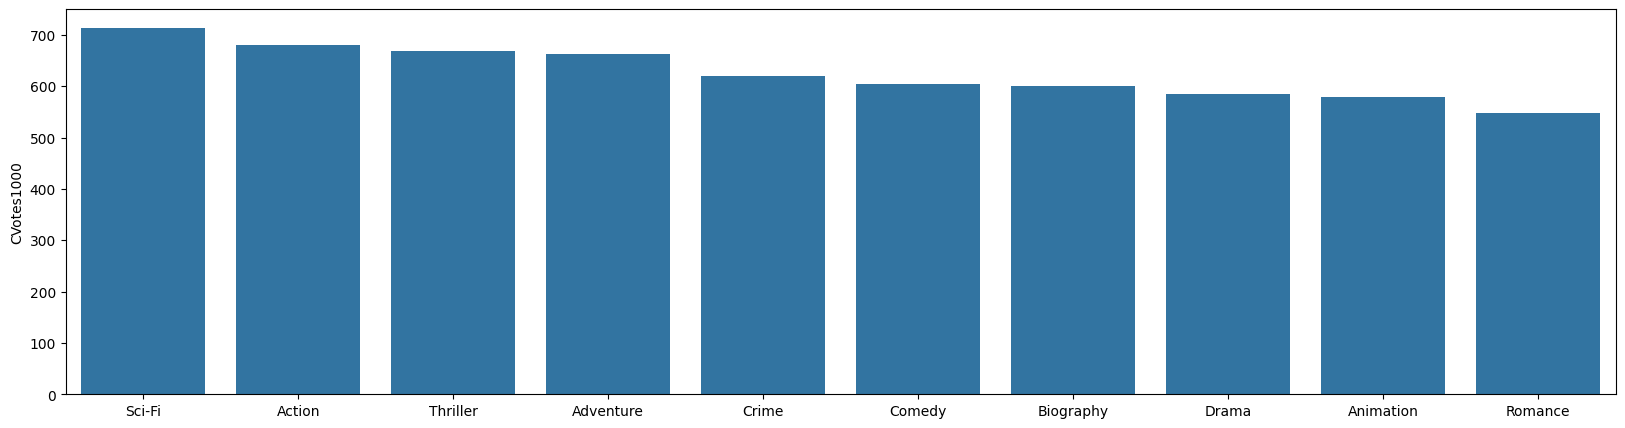

In [71]:
# Bar plot
plt.figure(figsize = (20,5))
sns.barplot(x = top10.index.values, y = top10.CVotes1000, data = top10)


**`Inferences:`** Write your inferences/observations here.

In [72]:
top10.shape

(10, 45)

In [73]:
#plt.figure(figsize = (20,5))
#sns.barplot(x = top10.index.values, y = top10.profit, data = top10)

In [74]:
top10.columns

Index(['CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05',
       'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale',
       'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829',
       'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'Votes1000', 'VotesUS', 'VotesnUS', 'cnt'],
      dtype='object')

In [75]:
top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0


In [76]:
df1.shape

(100, 73)

In [77]:
df1_top_25_profit = df1.sort_values('profit', ascending = False).head(25)
df1_top_25_profit


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Unnamed: 63,profit,MetaCriticScaled,AvgRating,trio_score,valid_actor1,valid_actor2,valid_actor3,valid_actor_combo,IFUS
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,NaN,691.662225,8.1,8.10,143.0,True,False,False,False,USA
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,NaN,403.279547,6.9,7.50,66000.0,True,False,False,False,USA
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,NaN,305.024263,6.5,7.25,17166.0,True,False,False,False,USA
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,NaN,294.645577,7.6,7.60,48523.0,True,False,False,False,USA
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,NaN,214.984497,9.2,8.75,16721.0,True,False,False,False,USA
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,NaN,198.130642,7.8,8.10,73000.0,True,False,False,False,USA
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,NaN,197.756197,8.3,8.05,21000.0,True,True,False,False,Non-USA
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,NaN,191.268248,7.8,7.95,57800.0,False,True,True,False,USA
41,Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,NaN,182.501645,7.2,7.45,9975.0,True,False,False,False,USA
18,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,NaN,181.454367,9.4,8.80,2151.0,True,True,False,False,USA


In [78]:
df_by_genre_by_profit = df1_top_25_profit[['Title','profit','genre_1', 'genre_2', 'genre_3', 'CVotesUS', 'CVotesnUS', 'VotesUS', 'VotesnUS','Votes45AF']]
df_by_genre_by_profit.shape

(25, 10)

In [79]:
# Create a column cnt and initialize it to 1
df_by_genre_by_profit['cnt'] = 1
df_by_genre_by_profit.head()

,Title,profit,genre_1,genre_2,genre_3,CVotesUS,CVotesnUS,VotesUS,VotesnUS,Votes45AF,cnt
97,Star Wars: Episode VII - The Force Awakens,691.662225,Action,Adventure,Fantasy,85141,250769,8.2,7.9,8.2,1
11,The Avengers,403.279547,Action,Sci-Fi,NaN,145826,423958,8.3,7.9,8.1,1
47,Deadpool,305.024263,Action,Adventure,Comedy,67933,241138,8.1,7.9,7.9,1
32,The Hunger Games: Catching Fire,294.645577,Action,Adventure,Mystery,68521,221430,7.7,7.4,7.9,1
12,Toy Story 3,214.984497,Animation,Adventure,Comedy,105490,267692,8.5,8.3,8.1,1


In [80]:
# Group the movies by individual genres

df_by_g1_profit = df_by_genre_by_profit.groupby('genre_1').sum(numeric_only = True
                                              )
df_by_g1_profit.head()

,profit,CVotesUS,CVotesnUS,VotesUS,VotesnUS,Votes45AF,cnt
genre_1,,,,,,,
Action,2345.639083,887160,2796325,65.8,63.9,63.9,8
Adventure,522.811290,249391,865692,31.7,30.8,31.9,4
Animation,967.964954,290682,878041,40.3,39.6,39.4,5
Biography,256.824612,95890,328163,16.1,15.7,16.2,2
Comedy,232.190713,113313,377071,16.3,15.7,15.2,2


In [81]:
df_by_g2_profit = df_by_genre_by_profit.groupby('genre_2').sum(numeric_only = True
                                              )
df_by_g2_profit.head()

,profit,CVotesUS,CVotesnUS,VotesUS,VotesnUS,Votes45AF,cnt
genre_2,,,,,,,
Action,197.756197,42963,114308,8.0,7.6,7.4,1
Adventure,2514.437651,828520,2634413,81.4,79.6,79.9,10
Drama,849.213061,394747,1362618,56.5,55.0,55.0,7
Family,146.347721,56139,180885,7.9,7.5,8.0,1
Fantasy,123.001229,78375,308010,7.8,7.8,8.0,1


In [82]:
df_by_g3_profit = df_by_genre_by_profit.groupby('genre_3').sum(numeric_only = True
                                              )
df_by_g3_profit.head()

,profit,CVotesUS,CVotesnUS,VotesUS,VotesnUS,Votes45AF,cnt
genre_3,,,,,,,
Adventure,197.756197,42963,114308,8.0,7.6,7.4,1
Comedy,1075.233020,315652,1004871,40.4,39.9,39.9,5
Fantasy,838.009946,141280,431654,16.1,15.4,16.2,2
History,133.029270,23736,56104,7.9,7.7,7.7,1
Music,121.101803,33360,117987,8.3,8.1,7.5,1


In [83]:
display(df_by_g1_profit.shape)
display(df_by_g2_profit.shape)
display(df_by_g3_profit.shape)


(7, 7)

(8, 7)

(10, 7)

In [84]:
# Add the grouped data frames and store it in a new data frame
temp = df_by_g1_profit.add(df_by_g2_profit, fill_value = 0 )
df_add_profit = temp.add(df_by_g3_profit, fill_value = 0 )
df_add_profit.shape

(16, 7)

In [85]:
df_add_profit.head()

,profit,CVotesUS,CVotesnUS,VotesUS,VotesnUS,Votes45AF,cnt
Action,2543.395280,930123.0,2910633.0,73.8,71.5,71.3,9.0
Adventure,3235.005138,1120874.0,3614413.0,121.1,118.0,119.2,15.0
Animation,967.964954,290682.0,878041.0,40.3,39.6,39.4,5.0
Biography,256.824612,95890.0,328163.0,16.1,15.7,16.2,2.0
Comedy,1307.423733,428965.0,1381942.0,56.7,55.6,55.1,7.0


In [86]:
df_add_profit.sort_values('cnt', ascending = False, inplace = True)

In [87]:
df_add_profit

,profit,CVotesUS,CVotesnUS,VotesUS,VotesnUS,Votes45AF,cnt
Adventure,3235.005138,1120874.0,3614413.0,121.1,118.0,119.2,15.0
Drama,1280.872436,557507.0,1922871.0,80.0,78.5,78.5,10.0
Action,2543.395280,930123.0,2910633.0,73.8,71.5,71.3,9.0
Comedy,1307.423733,428965.0,1381942.0,56.7,55.6,55.1,7.0
Sci-Fi,1150.692320,642957.0,2113140.0,49.4,48.0,47.7,6.0
Animation,967.964954,290682.0,878041.0,40.3,39.6,39.4,5.0
Fantasy,961.011175,219655.0,739664.0,23.9,23.2,24.2,3.0
Biography,256.824612,95890.0,328163.0,16.1,15.7,16.2,2.0
Thriller,372.215593,237330.0,794401.0,16.3,16.2,15.4,2.0
Mystery,401.380973,139188.0,502017.0,15.8,15.5,15.6,2.0


In [88]:
df_add_profit[list(df_add_profit.describe().columns)].corr()

,profit,CVotesUS,CVotesnUS,VotesUS,VotesnUS,Votes45AF,cnt
profit,1.000000,0.971780,0.966376,0.950354,0.948623,0.949586,0.947797
CVotesUS,0.971780,1.000000,0.998969,0.951991,0.950393,0.949428,0.948292
CVotesnUS,0.966376,0.998969,1.000000,0.956214,0.954791,0.953836,0.952821
VotesUS,0.950354,0.951991,0.956214,1.000000,0.999973,0.999889,0.999901
VotesnUS,0.948623,0.950393,0.954791,0.999973,1.000000,0.999872,0.999932
Votes45AF,0.949586,0.949428,0.953836,0.999889,0.999872,1.000000,0.999950
cnt,0.947797,0.948292,0.952821,0.999901,0.999932,0.999950,1.000000


In [89]:
df1[list(df1.describe().columns)].corr()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes45AF,Votes1000,VotesUS,VotesnUS,Unnamed: 62,Unnamed: 63,profit,MetaCriticScaled,AvgRating,trio_score
title_year,1.000000,0.047194,0.108930,0.004138,0.274125,0.191715,0.140239,0.192103,0.031092,-0.095033,...,0.093601,0.129848,0.102924,0.035348,NaN,NaN,0.121870,0.192103,0.214094,0.200241
budget,0.047194,1.000000,0.760114,0.123067,0.051393,0.328815,0.225800,-0.234438,0.352666,0.459134,...,0.218900,0.347874,0.239507,0.138510,NaN,NaN,0.356648,-0.234438,-0.166458,0.177788
Gross,0.108930,0.760114,1.000000,0.070104,0.060883,0.294711,0.270453,-0.127399,0.255991,0.476661,...,0.323048,0.316611,0.317505,0.163429,NaN,NaN,0.878152,-0.127399,-0.053733,0.150527
actor_1_facebook_likes,0.004138,0.123067,0.070104,1.000000,0.381536,0.304237,0.296544,-0.245310,0.175864,0.312195,...,0.001796,0.231956,0.261410,0.257815,NaN,NaN,0.010189,-0.245310,-0.161942,0.750583
actor_2_facebook_likes,0.274125,0.051393,0.060883,0.381536,1.000000,0.505427,0.209267,-0.026311,0.118421,0.145672,...,0.112150,0.037866,0.177786,0.169507,NaN,NaN,0.049805,-0.026311,0.024695,0.867027
actor_3_facebook_likes,0.191715,0.328815,0.294711,0.304237,0.505427,1.000000,0.185154,-0.137294,0.100897,0.358200,...,0.133650,0.103388,0.133998,0.125138,NaN,NaN,0.182445,-0.137294,-0.084004,0.630123
IMDb_rating,0.140239,0.225800,0.270453,0.296544,0.209267,0.185154,1.000000,0.133402,0.259959,0.732677,...,0.366989,0.669412,0.851969,0.967346,NaN,NaN,0.222609,0.133402,0.378566,0.306856
MetaCritic,0.192103,-0.234438,-0.127399,-0.245310,-0.026311,-0.137294,0.133402,1.000000,-0.225234,-0.101903,...,-0.047092,0.316923,0.320253,0.177280,NaN,NaN,-0.010977,1.000000,0.967803,-0.164949
Runtime,0.031092,0.352666,0.255991,0.175864,0.118421,0.100897,0.259959,-0.225234,1.000000,0.404375,...,0.165323,0.163160,0.134567,0.212395,NaN,NaN,0.108416,-0.225234,-0.141991,0.178449
CVotes10,-0.095033,0.459134,0.476661,0.312195,0.145672,0.358200,0.732677,-0.101903,0.404375,1.000000,...,0.169021,0.561840,0.641482,0.704307,NaN,NaN,0.347303,-0.101903,0.090985,0.329618


In [90]:
df_add_profit.columns

Index(['profit', 'CVotesUS', 'CVotesnUS', 'VotesUS', 'VotesnUS', 'Votes45AF',
       'cnt'],
      dtype='object')

In [91]:
df_add_profit.reset_index()

,index,profit,CVotesUS,CVotesnUS,VotesUS,VotesnUS,Votes45AF,cnt
0,Adventure,3235.005138,1120874.0,3614413.0,121.1,118.0,119.2,15.0
1,Drama,1280.872436,557507.0,1922871.0,80.0,78.5,78.5,10.0
2,Action,2543.395280,930123.0,2910633.0,73.8,71.5,71.3,9.0
3,Comedy,1307.423733,428965.0,1381942.0,56.7,55.6,55.1,7.0
4,Sci-Fi,1150.692320,642957.0,2113140.0,49.4,48.0,47.7,6.0
5,Animation,967.964954,290682.0,878041.0,40.3,39.6,39.4,5.0
6,Fantasy,961.011175,219655.0,739664.0,23.9,23.2,24.2,3.0
7,Biography,256.824612,95890.0,328163.0,16.1,15.7,16.2,2.0
8,Thriller,372.215593,237330.0,794401.0,16.3,16.2,15.4,2.0
9,Mystery,401.380973,139188.0,502017.0,15.8,15.5,15.6,2.0


<Axes: xlabel='None', ylabel='profit'>

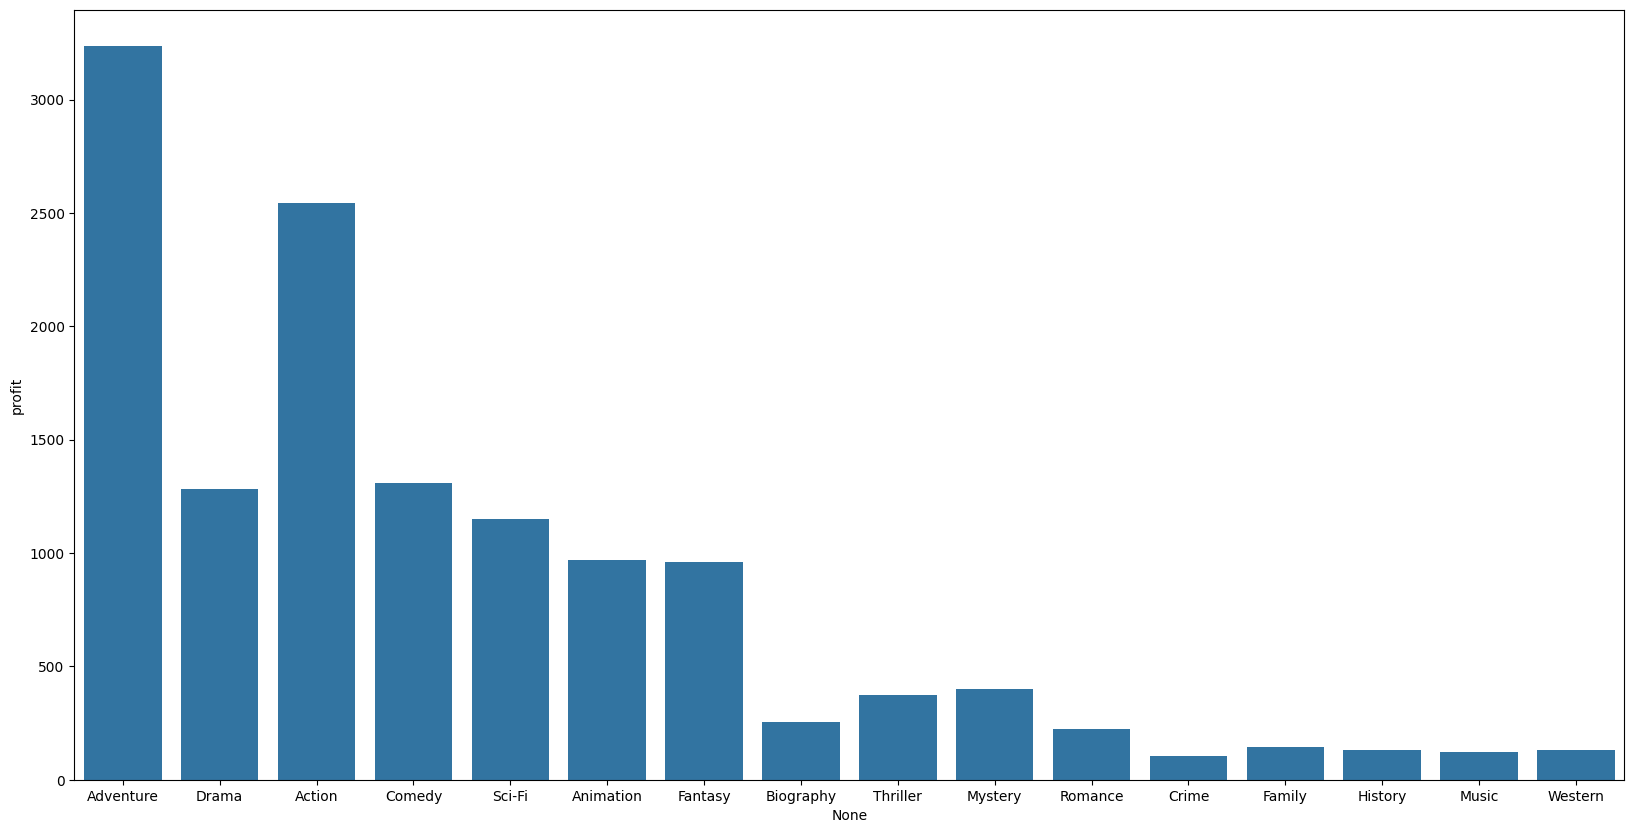

In [92]:
#plot profit against genre

plt.figure(figsize = (20,10))
sns.barplot(y='profit', x = df_add_profit.index, data = df_add_profit)


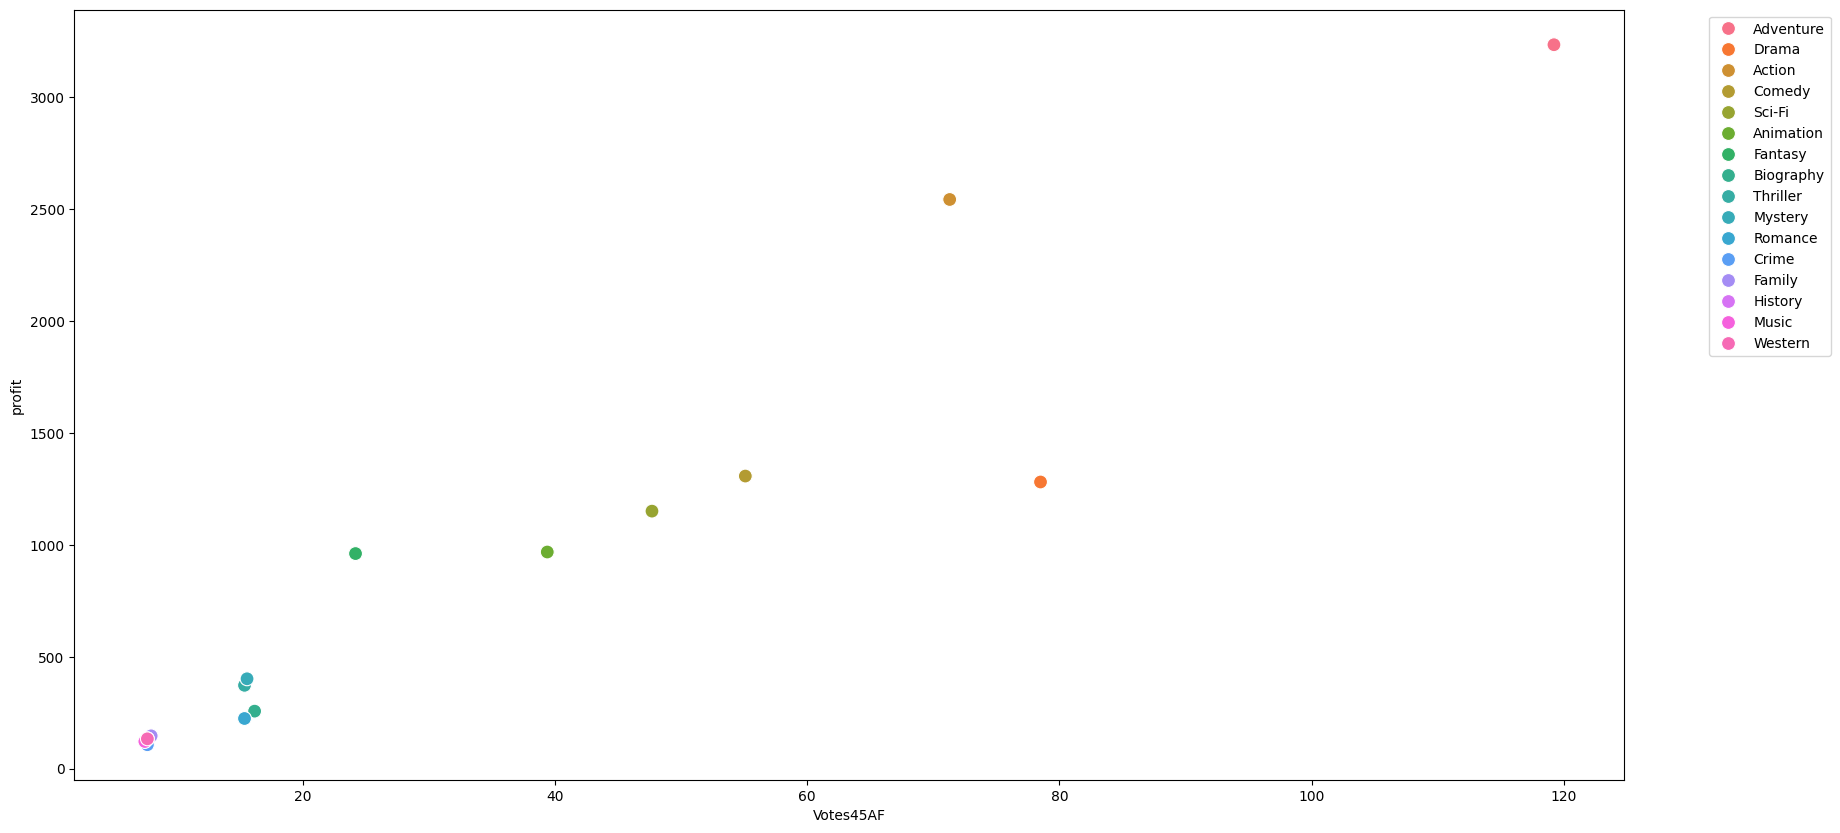

In [93]:
# Plot Votes45AF against profit, colored by genre with annotations
plt.figure(figsize = (20,10))
ax = sns.scatterplot(x = 'Votes45AF', y = 'profit', hue = df_add_profit.index, data = df_add_profit, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add annotations
#for genre, row in df_add_profit.iterrows():
#    ax.text(row['Votes45AF'], row['profit'], genre, fontsize=9)

plt.show()

In [96]:
df1.columns

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country', 'Unnamed: 62', 'Unnamed: 63',
       'profit', 'MetaCriticScaled',

In [122]:
#Create df with profit and cvotes

#df_votes_profit = df1[['profit','CVotes1000',
#       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
#       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
#       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
#       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
#       'CVotes45AM', 'CVotes45AF']]

df_votes_profit = df1[['profit','CVotes1000','CVotesFemale','CVotesMale','Title']]

df_votes_profit.head()




,profit,CVotes1000,CVotesFemale,CVotesMale,Title
2,39.738905,298,24977,68921,Lion
27,132.568851,885,239796,1044318,Inception
14,33.914986,710,71008,370835,X-Men: Days of Future Past
4,38.695371,402,22834,92452,Manchester by the Sea
8,198.130642,840,143070,842343,The Dark Knight Rises


In [123]:
df_votes_profit.shape

(100, 5)

In [124]:
df_votes_profit.sort_values('profit',ascending=False,inplace=True)
df_votes_profit.head()

,profit,CVotes1000,CVotesFemale,CVotesMale,Title
97,691.662225,712,68664,425971,Star Wars: Episode VII - The Force Awakens
11,403.279547,842,151617,691783,The Avengers
47,305.024263,667,79804,391955,Deadpool
32,294.645577,693,115421,307237,The Hunger Games: Catching Fire
12,214.984497,769,98386,389014,Toy Story 3


In [125]:
df_votes_profit.reset_index()
df_votes_profit.head()

,profit,CVotes1000,CVotesFemale,CVotesMale,Title
97,691.662225,712,68664,425971,Star Wars: Episode VII - The Force Awakens
11,403.279547,842,151617,691783,The Avengers
47,305.024263,667,79804,391955,Deadpool
32,294.645577,693,115421,307237,The Hunger Games: Catching Fire
12,214.984497,769,98386,389014,Toy Story 3


In [126]:
df_votes_profit.set_index('profit', inplace=True)
display(df_votes_profit.head())

,CVotes1000,CVotesFemale,CVotesMale,Title
profit,,,,
691.662225,712,68664,425971,Star Wars: Episode VII - The Force Awakens
403.279547,842,151617,691783,The Avengers
305.024263,667,79804,391955,Deadpool
294.645577,693,115421,307237,The Hunger Games: Catching Fire
214.984497,769,98386,389014,Toy Story 3


In [127]:
#make the profit column decimal one
df_votes_profit.index = df_votes_profit.index.to_series().round(1)
df_votes_profit.head()

,CVotes1000,CVotesFemale,CVotesMale,Title
profit,,,,
691.7,712,68664,425971,Star Wars: Episode VII - The Force Awakens
403.3,842,151617,691783,The Avengers
305.0,667,79804,391955,Deadpool
294.6,693,115421,307237,The Hunger Games: Catching Fire
215.0,769,98386,389014,Toy Story 3


<Axes: ylabel='profit'>

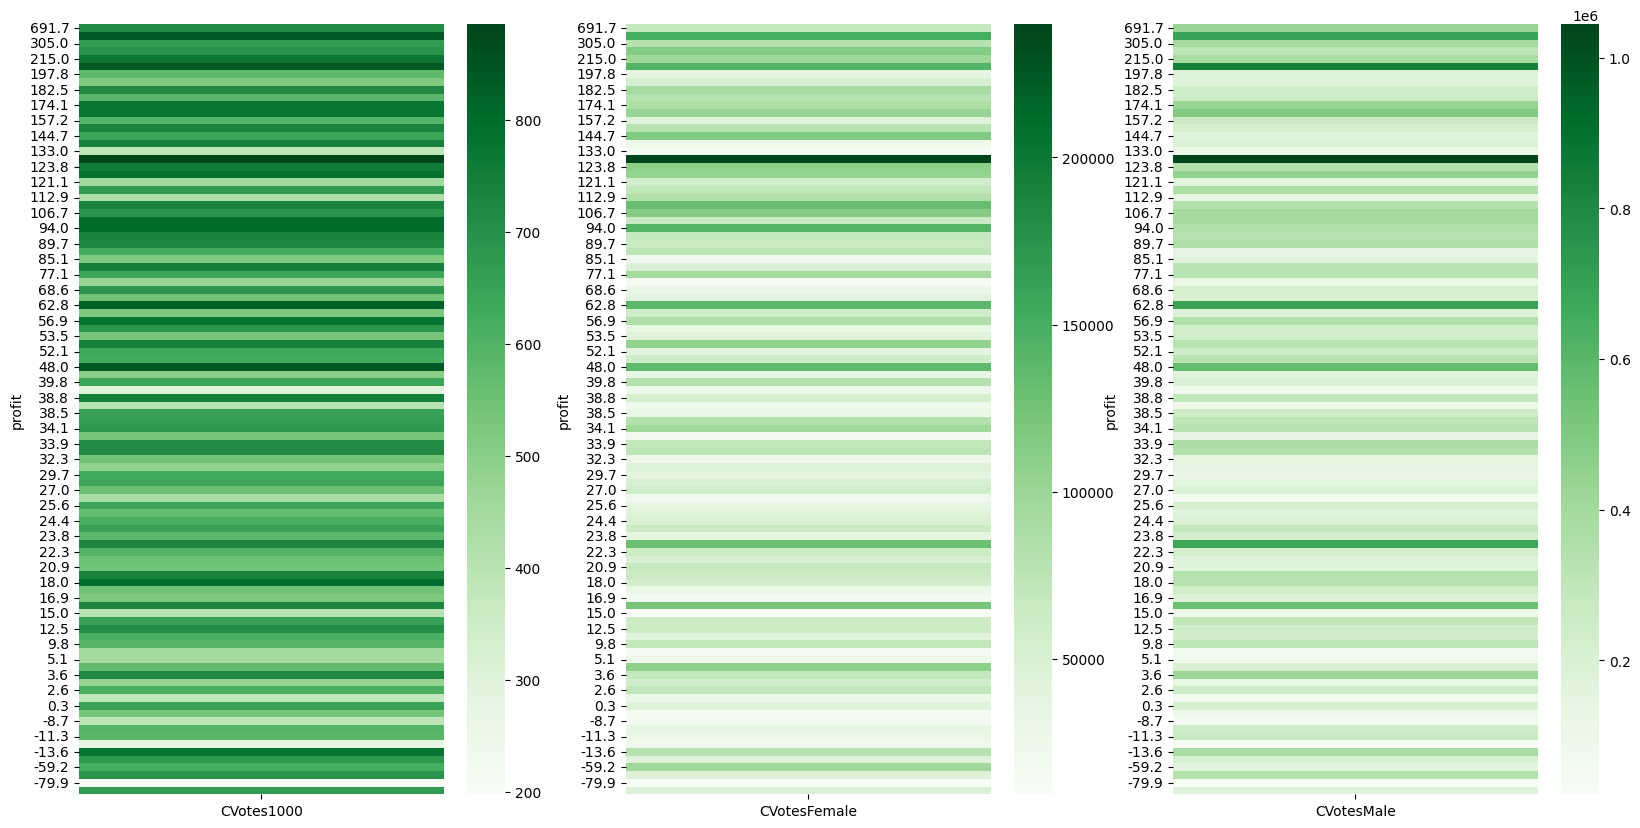

In [128]:
# Plot CVotes-related columns

plt.figure(figsize = (20,10))

#Add label for axes
#plt.xlabel('CVotes1000')
#plt.ylabel('profit')

plt.subplot(1,3,1)
#sns.heatmap(df_votes_profit[['CVotes1000','CVotesFemale','CVotesMale']], cmap = 'Greens', fmt = 'd')
sns.heatmap(df_votes_profit[['CVotes1000']], cmap = 'Greens', fmt = 'd')

plt.subplot(1,3,2)
#sns.heatmap(df_votes_profit[['CVotes1000','CVotesFemale','CVotesMale']], cmap = 'Greens', fmt = 'd')
sns.heatmap(df_votes_profit[['CVotesFemale']], cmap = 'Greens', fmt = 'd')

plt.subplot(1,3,3)
#sns.heatmap(df_votes_profit[['CVotes1000','CVotesFemale','CVotesMale']], cmap = 'Greens', fmt = 'd')
sns.heatmap(df_votes_profit[['CVotesMale']], cmap = 'Greens', fmt = 'd')

#plt.subplot(1,2,1)
#sns.lineplot(x = 'CVotes1000', y = "profit", data = df_votes_profit)



#plt.subplot(1,3,2)
#sns.lineplot(x = 'CVotesFemale', y = "profit", data = df1)

#sns.lineplot(x = 'CVotesMale', y = "profit", data = df1)

#sns.heatmap(df_votes_profit[['CVotesU18F','CVotes1829F', 'CVotes3044F', 'CVotes45AF']], cmap = 'Greens', fmt = 'd')


#plt.subplot(1,2,2)
#sns.heatmap(top10[['CVotesU18F','CVotes1829F', 'CVotes3044F', 'CVotes45AF']], annot =True, cmap = 'Greens', fmt = 'd')
#plt.title ('CVOTES FEMALES')

In [129]:
# Display rows between profit value > 125 and < 140

df_votes_profit[(df_votes_profit.index > 125) & (df_votes_profit.index < 140)]

,CVotes1000,CVotesFemale,CVotesMale,Title
profit,,,,
133.0,747,27125,197105,True Grit
133.0,393,14262,96591,Straight Outta Compton
132.6,885,239796,1044318,Inception


In [132]:
#display movies from df1 frame

#df1[df1['Title'] == 'Straight Outta Compton' or df1['Title'] == 'True Grit' or df1['Title'] == 'Inception']

df1[(df1['Title'] == 'Straight Outta Compton') | (df1['Title'] == 'True Grit') | (df1['Title'] == 'Inception')]

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Unnamed: 63,profit,MetaCriticScaled,AvgRating,trio_score,valid_actor1,valid_actor2,valid_actor3,valid_actor_combo,IFUS
27,Inception,2010,160.0,292.568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,NaN,132.568851,7.4,8.10,79000.0,True,True,False,False,USA
55,True Grit,2010,38.0,171.031347,Matt Damon,Jeff Bridges,Bruce Green,13000,12000.0,538.0,...,NaN,133.031347,8.0,7.80,25538.0,True,True,False,False,USA
61,Straight Outta Compton,2015,28.0,161.029270,Aldis Hodge,Neil Brown Jr.,R. Marcos Taylor,559,427.0,303.0,...,NaN,133.029270,7.2,7.55,1289.0,True,False,False,False,USA


In [95]:
#Other than Drama, there is high correlation of the voter45AF and profit for other genre. Suggested to create promotion and increase votes for this segment

**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.

#Include summary -- most important

summary of the assignment and insights/recommendations from business pov

1.Profit has slightly stronger correlation (0.3+) with votes45AF
2.Action and Adventure have higher profits compared to other genre
Comedy, Sci-Fi and Drama are second profit category
3.Other than Drama, there is high correlation of the voter45AF and profit for other genre. Suggested to create promotion and increase votes for this segment

- "Straight Outta Compton", made on very low budget with few FB likes and trio score has made 5 times profit the budget. Will be good to deep dive. It has good metacritic rating as well.It has significant cvotes across C1000, cmales and cfemale


--------------------

4. Count of votes have significantly reduced in the 45+category across both Male and Female, though scifi saw slightly more votes in this category.  

- Inference 2:Romance and has been voted by significant percent of total young female compared to male (close to  80% compared to men with about 40% of total votes)
- Inference 3:Action and adventure have consistently similar high votes

•	Inference 1:Romance is rated low across both Male and Female audiences of age group 30+
•	Inference 2:Animation,Adventure and Bio is rated high by Females
•	Inference 3:Male group Above30 have more flattened votes vs females with more diverse interests across different genre.

- Inference 1:Total count of votes in non-us is almost 4 times us voters
- Inference 2:Count of both US and Non-US voters are more for US movies vs non-US movies
- Non-US voters median for both US & Non-US movies is closer. Indicating international audience has more uniform acceptance across US and NonUS movies

- Inference 1:Though, Median of the US Votes is higher than non-us given number of voters from non-US is 4 times, the weightage of non-us voters is overall higher

